# Diamond Quality Analysis

## Frame
If you want to buy one of the best diamonds in the world, what are the different aspects you want to look at? Let's find out how a stone is turned into a precious gem.

It is the **4C's** that differentiates each stone

* Carat
* Cut
* Clarity
* Colour

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13,8)

## Acquire

In [3]:
df = pd.read_csv("./diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


### Carat
The carat weight measures the mass of a diamond. One carat is defined as 200 milligrams (about 0.007 ounce avoirdupois). The point unit—equal to one one-hundredth of a carat (0.01 carat, or 2 mg)—is commonly used for diamonds of less than one carat. All else being equal, the price per carat increases with carat weight, since larger diamonds are both rarer and more desirable for use as gemstones.

In [4]:
df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

### Cut
Diamond cutting is the art and science of creating a gem-quality diamond out of mined rough. The cut of a diamond describes the manner in which a diamond has been shaped and polished from its beginning form as a rough stone to its final gem proportions. The cut of a diamond describes the quality of workmanship and the angles to which a diamond is cut. Often diamond cut is confused with "shape".

In [5]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

### Clarity
Diamond clarity is a quality of diamonds relating to the existence and visual appearance of internal characteristics of a diamond called inclusions, and surface defects called blemishes. Inclusions may be crystals of a foreign material or another diamond crystal, or structural imperfections such as tiny cracks that can appear whitish or cloudy. The number, size, color, relative location, orientation, and visibility of inclusions can all affect the relative clarity of a diamond. A clarity grade is assigned based on the overall appearance of the stone under ten times magnification.

![](../img/diamond-clarity.png)

In [6]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

### Colour
The finest quality as per color grading is totally colorless, which is graded as "D" color diamond across the globe, meaning it is absolutely free from any color. The next grade has a very slight trace of color, which can be observed by any expert diamond valuer/grading laboratory. However when studded in jewellery these very light colored diamonds do not show any color or it is not possible to make out color shades. These are graded as E color or F color diamonds.

![](../img/diamond-colors.png)

## Refine
To perform any kind of visual exploration, we will need a numeric values for the cut categories. We need to create a new column with numeric values the cut categories

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["cut_num"] = encoder.fit_transform(df.cut)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1


In [9]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

We need to convert values in color column to numeric values.

In [10]:
encoder = LabelEncoder()
df["color_num"] = encoder.fit_transform(df.color)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2,1
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3,1
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1,1
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3,5
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1,6


#### Exercise
Create a column **clarity_num** with clarity as numeric value

In [11]:
df["clarity_num"] = encoder.fit_transform(df.clarity)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1,6,3


What is the highest price of D colour diamonds?

In [12]:
df_D = df.loc[df['color'] == 'D']

In [13]:
df_D = df_D.sort_values(by='price', ascending=False)
df_D.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
27676,2.19,Ideal,D,SI2,61.8,57,18693,8.23,8.49,5.17,2,0,3
27667,2.01,Ideal,D,SI2,62.1,56,18674,8.02,8.11,5.01,2,0,3
27647,2.11,Premium,D,SI2,60.9,60,18575,8.28,8.21,5.02,3,0,3
27635,1.04,Very Good,D,IF,61.3,56,18542,6.53,6.55,4.01,4,0,1
27627,2.14,Very Good,D,SI2,60.3,60,18526,8.31,8.43,5.05,4,0,3


## Visual Exploration


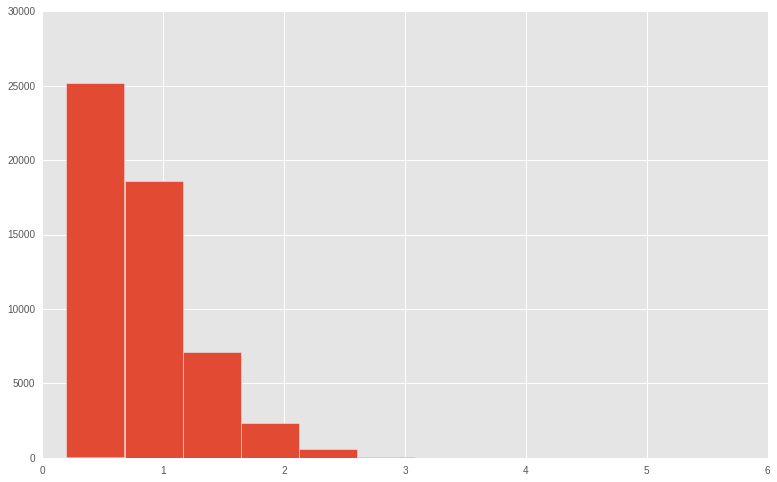

In [14]:
df.carat.hist()

#### Exercise
Plot hist for colour_num, cut_num, clarity_num

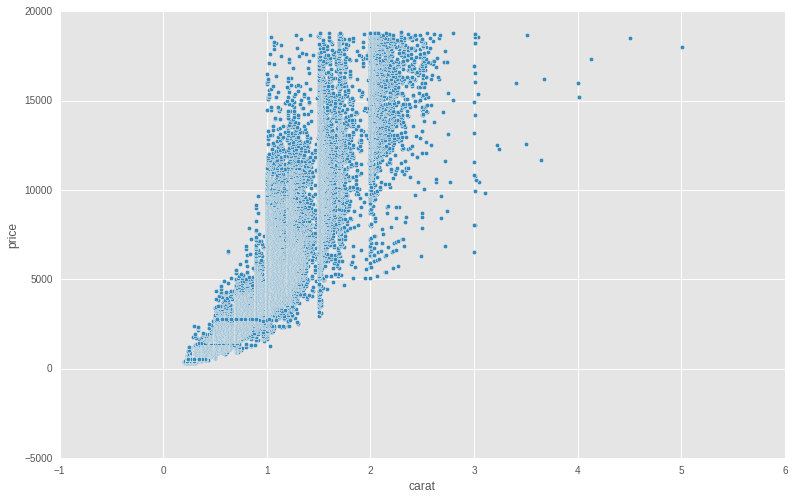

In [15]:
df.plot(x="carat", y="price", kind="scatter")

#### Exercise
Plot the other C's against price

### Plot the C's vs price after log transformation

But why log transformation?

......

In [16]:
df["carat_log"] = np.log10(df.carat)
df["price_log"] = np.log10(df.price)

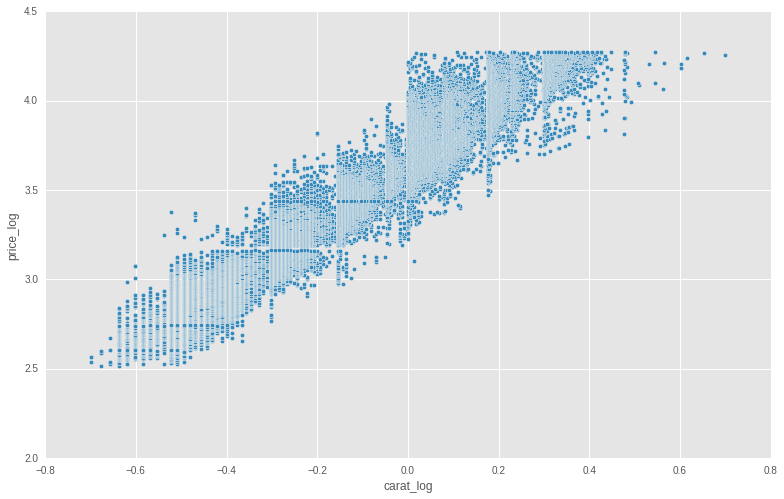

In [17]:
df.plot(x="carat_log", y="price_log", kind="scatter")

#### Exercise:
Plot the log transforms for the other C's against price

### Compare how the price change with respect to carat and colour of a diamond

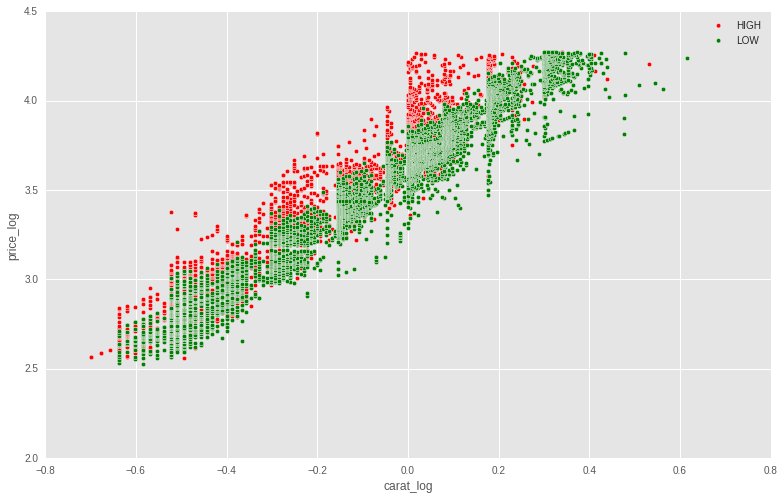

In [18]:
ax = df[df.color == 'D'].plot(x="carat_log", y="price_log", kind="scatter", color="red", label="HIGH")
df[df.color == 'H'].plot(x="carat_log", y="price_log", kind="scatter", color="green", label="LOW", ax=ax)

#### Exercise
Compare other C's

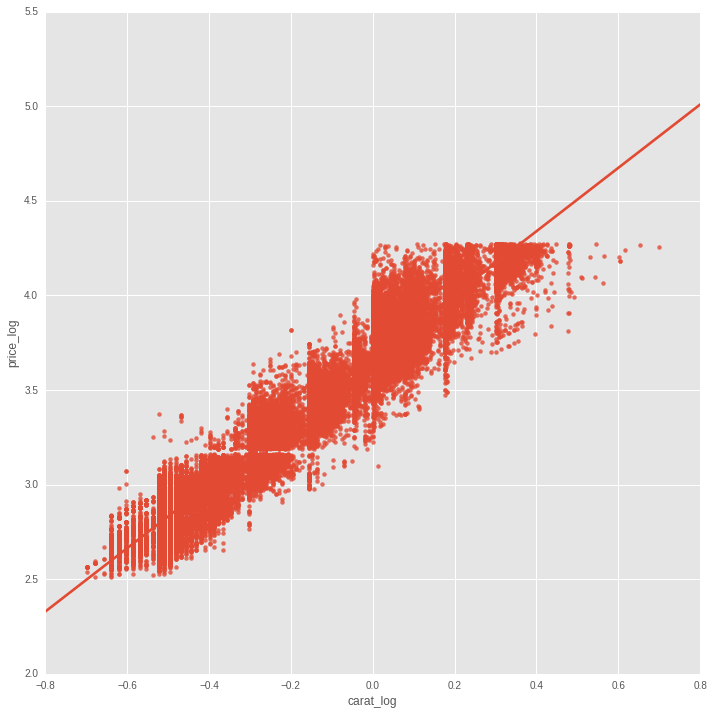

In [19]:
sns.lmplot(data=df, x="carat_log", y="price_log", size=10)

Try more lmplots for different columns

## Linear Regression

![](../img/estimating_coefficients.png)

Carat  vs Price

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_model = LinearRegression()

In [22]:
X_train = df["carat_log"]
X_train = X_train.reshape(X_train.shape[0],1)

y_train = df["price_log"]

In [23]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [25]:
df[['carat_log','price_log']].head()

,carat_log,price_log
0,-0.638272,2.513218
1,-0.677781,2.513218
2,-0.638272,2.514548
3,-0.537602,2.523746
4,-0.508638,2.525045


In [26]:
df[['carat_log','price_log']].tail()

,carat_log,price_log
53935,-0.142668,3.440437
53936,-0.142668,3.440437
53937,-0.154902,3.440437
53938,-0.065502,3.440437
53939,-0.124939,3.440437


In [27]:
X_test = pd.Series([-0.124939, -0.638272])
X_test = X_test.reshape(X_test.shape[0],1)


In [28]:
predicted = linear_model.predict(X_test)
print predicted

test_samples = pd.Series(predicted)
test_samples = test_samples.reshape(test_samples.shape[0],1)

[ 3.45983187  2.59957984]


In [29]:
true_values = pd.Series([3.440437, 2.513218])
true_values = true_values.reshape(true_values.shape[0],1)

#### Goodness of fit - R2 score

![](../img/r2.gif)


In [30]:
linear_model.score(X_test, true_values)

0.98177455346300524

In [31]:
linear_model.coef_

array([ 1.67581673])

In [32]:
linear_model.intercept_

3.6692067336548253

## Using multi variable

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,carat_log,price_log
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2,1,3,-0.638272,2.513218
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3,1,2,-0.677781,2.513218
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1,1,4,-0.638272,2.514548
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3,5,5,-0.537602,2.523746
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1,6,3,-0.508638,2.525045


** We need to do one hot encoding on cut **

In [34]:
df_encoded = pd.get_dummies(df["cut_num"])
df_encoded.columns = ['cut_num0', 'cut_num1', 'cut_num2', 'cut_num3', 'cut_num4']
df_encoded.head()

,cut_num0,cut_num1,cut_num2,cut_num3,cut_num4
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [35]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,carat_log,price_log
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2,1,3,-0.638272,2.513218
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3,1,2,-0.677781,2.513218
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1,1,4,-0.638272,2.514548
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3,5,5,-0.537602,2.523746
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1,6,3,-0.508638,2.525045


**Concatenate the two dataframes**

In [37]:
frames = [df, df_encoded]

df2 = pd.concat(frames, axis=1)
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,carat_log,price_log,cut_num0,cut_num1,cut_num2,cut_num3,cut_num4
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2,1,3,-0.638272,2.513218,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3,1,2,-0.677781,2.513218,0,0,0,1,0
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1,1,4,-0.638272,2.514548,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3,5,5,-0.537602,2.523746,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1,6,3,-0.508638,2.525045,0,1,0,0,0


In [38]:
X4_train = df2[["carat_log", "cut_num0", "cut_num1", "cut_num2", "cut_num3"]]

In [40]:
X4_train.head()

,carat_log,cut_num0,cut_num1,cut_num2,cut_num3
0,-0.638272,0,0,1,0
1,-0.677781,0,0,0,1
2,-0.638272,0,1,0,0
3,-0.537602,0,0,0,1
4,-0.508638,0,1,0,0


In [41]:
y4_train = df2["price_log"]

In [42]:
y4_train.head()

0    2.513218
1    2.513218
2    2.514548
3    2.523746
4    2.525045
Name: price_log, dtype: float64

In [43]:
X4_train.shape

(53940, 5)

In [53]:
linear_model2 = LinearRegression()

In [54]:
linear_model2.fit(X4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
X4_test = pd.Series([-0.522879, 0, 1, 0, 0, 0])

In [47]:
X4_test

0   -0.522879
1    0.000000
2    1.000000
3    0.000000
4    0.000000
5    0.000000
dtype: float64

In [52]:
linear_model2.predict(X4_test.reshape(1,6))

ValueError: shapes (1,6) and (5,) not aligned: 6 (dim 1) != 5 (dim 0)

In [50]:
predicted = linear_model2.predict(X4_test)
print predicted

/home/init/code/intro-python-data-science/env/local/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,6) and (5,) not aligned: 6 (dim 1) != 5 (dim 0)

In [119]:
y_train[10]

2.5301996982030821

In [120]:
true_values = pd.Series([2.5301996982030821])

In [121]:
X4_test

0   -0.522879
1    0.000000
2    1.000000
3    0.000000
4    0.000000
5    0.000000
dtype: float64

In [122]:
X4_test = X4_test.reshape(1,6)

In [123]:
X4_test

array([[-0.522879,  0.      ,  1.      ,  0.      ,  0.      ,  0.      ]])

In [124]:
true_values

0    2.5302
dtype: float64

In [125]:
linear_model2.score(X4_test, true_values)

0.0

In [126]:
linear_model2.coef_

array([  1.69586059e+00,  -4.00626867e+09,  -4.00626867e+09,
        -4.00626867e+09,  -4.00626867e+09,  -4.00626867e+09])

In [127]:
linear_model.intercept_

4006268670.275506

In [128]:
import statsmodels.formula.api as smf

In [130]:
lm = smf.ols(formula="price_log ~ carat_log",data=df).fit()

In [131]:
lm.params

Intercept    3.669207
carat_log    1.675817
dtype: float64

In [150]:
lm2 = smf.ols(formula="price_log ~ carat_log + cut_num0 + cut_num1 + cut_num2 + cut_num3 + cut_num4",data=df).fit()

In [151]:
lm2.params

Intercept    5.308168e+09
carat_log    1.696012e+00
cut_num0    -5.308168e+09
cut_num1    -5.308168e+09
cut_num2    -5.308168e+09
cut_num3    -5.308168e+09
cut_num4    -5.308168e+09
dtype: float64